# AQI PREDICTION MODEL USING PYTHON

-PM2.5 PM10

-NO, NO2

-NH3 - Ammonia

-CO

-So2

-O3e

-Benzene, Toluene, Xylen

In [1]:
pip install numpy pandas matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
df = pd.read_csv('air quality data.CSV')
df.head() # Top 5 rows!

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [4]:
# Shape - rows and cols!
df.shape

(29531, 16)

In [5]:
# Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [6]:
# to know the duplicate values
df.duplicated().sum()

np.int64(0)

In [7]:
# to know the duplicate values
df.duplicated().sum()

np.int64(0)

In [8]:
# To check missing values
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [9]:
# Drop the rows where 'AQI' has missing values
df.dropna(subset=['AQI'], inplace = True)

In [10]:
df.isnull().sum().sort_values(ascending=False)

Xylene        15372
PM10           7086
NH3            6536
Toluene        5826
Benzene        3535
NOx            1857
O3              807
PM2.5           678
SO2             605
CO              445
NO2             391
NO              387
Date              0
City              0
AQI               0
AQI_Bucket        0
dtype: int64

In [11]:
df.shape

(24850, 16)

In [12]:
# Summary of Statistics in the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,24172.0,67.476613,63.075398,0.04,29.0000,48.785,80.9250,914.94
PM10,17764.0,118.454435,89.487976,0.03,56.7775,96.180,150.1825,917.08
NO,24463.0,17.622421,22.421138,0.03,5.6600,9.910,20.0300,390.68
NO2,24459.0,28.978391,24.627054,0.01,11.9400,22.100,38.2400,362.21
NOx,22993.0,32.289012,30.712855,0.00,13.1100,23.680,40.1700,378.24
NH3,18314.0,23.848366,25.875981,0.01,8.9600,16.310,30.3600,352.89
CO,24405.0,2.345267,7.075208,0.00,0.5900,0.930,1.4800,175.81
SO2,24245.0,14.362933,17.428693,0.01,5.7300,9.220,15.1400,186.08
O3,24043.0,34.912885,21.724525,0.01,19.2500,31.250,46.0800,257.73
Benzene,21315.0,3.458668,16.036020,0.00,0.2300,1.290,3.3400,455.03


In [13]:
# Percentage of the null values
null_values_percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
null_values_percentage

Xylene        61.859155
PM10          28.515091
NH3           26.301811
Toluene       23.444668
Benzene       14.225352
NOx            7.472837
O3             3.247485
PM2.5          2.728370
SO2            2.434608
CO             1.790744
NO2            1.573441
NO             1.557344
Date           0.000000
City           0.000000
AQI            0.000000
AQI_Bucket     0.000000
dtype: float64

### Key Considerations
Xylene has the highest percentage of missing values - 61.86%

PM10 and NH3 28 - 26 %

### Week2 - VISUALIZATION

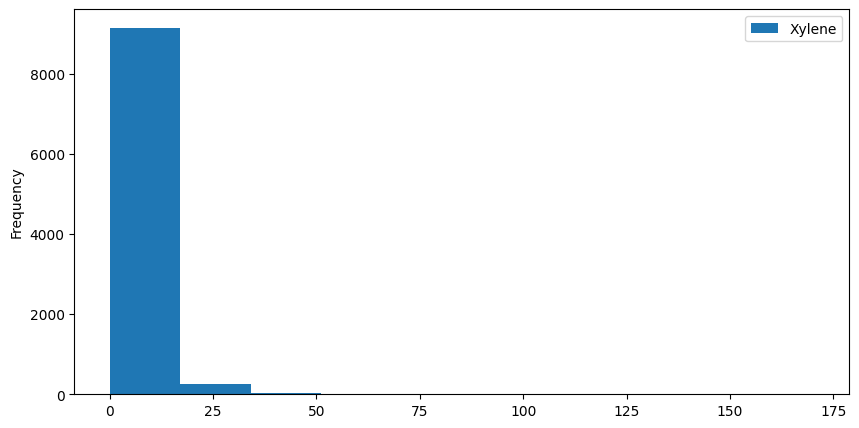

In [14]:
# Univariate analysis
df['Xylene'].plot(kind ='hist',figsize=(10,5))
plt.legend()
plt.show()

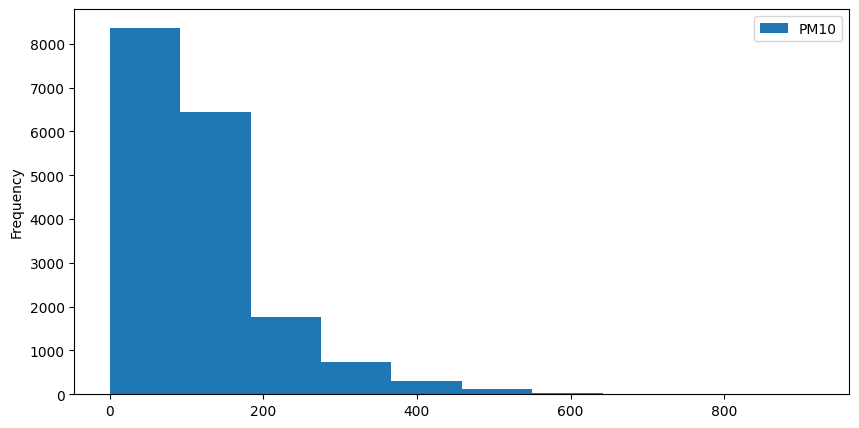

In [15]:
df['PM10'].plot(kind ='hist',figsize=(10,5))
plt.legend()
plt.show()

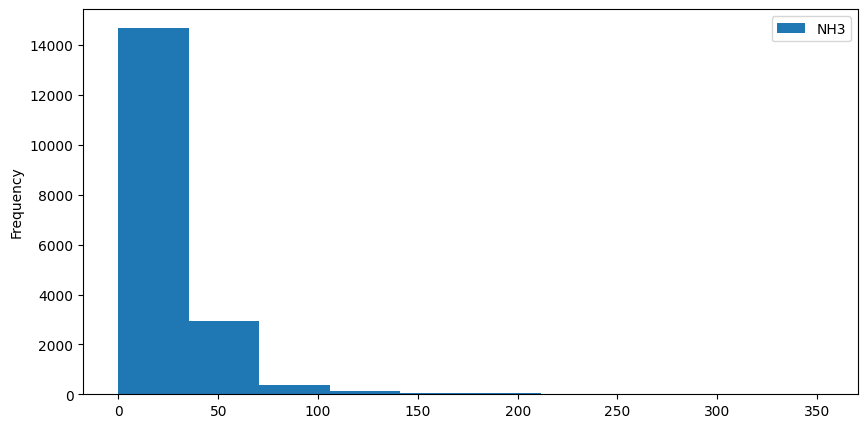

In [16]:
df['NH3'].plot(kind ='hist',figsize=(10,5))
plt.legend()
plt.show()

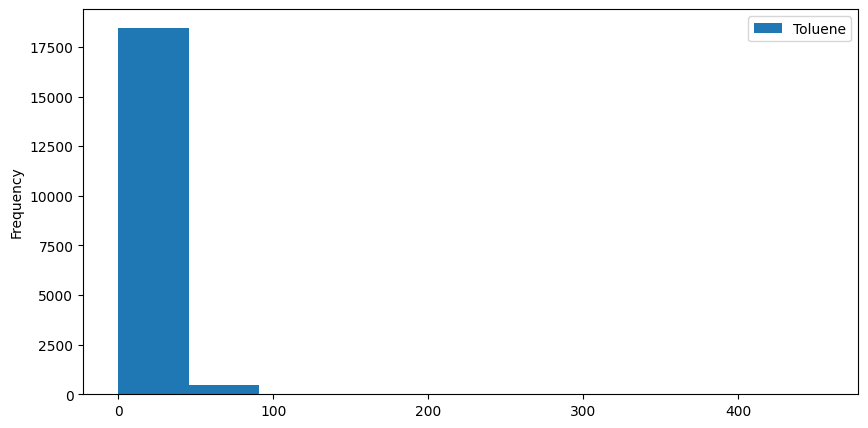

In [17]:
df['Toluene'].plot(kind ='hist',figsize=(10,5))
plt.legend()
plt.show()

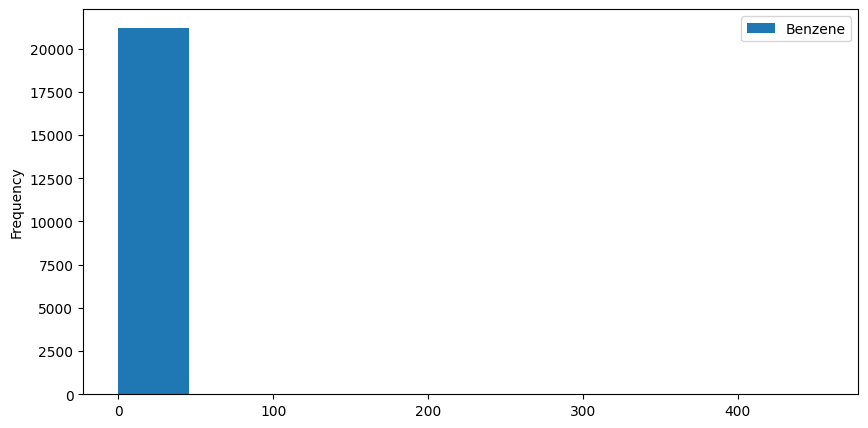

In [18]:
df['Benzene'].plot(kind ='hist',figsize=(10,5))
plt.legend()
plt.show()

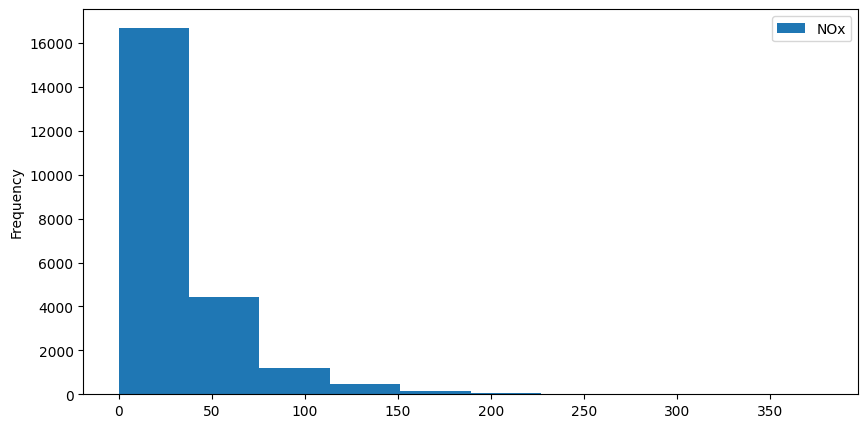

In [19]:
df['NOx'].plot(kind ='hist',figsize=(10,5))
plt.legend()
plt.show()

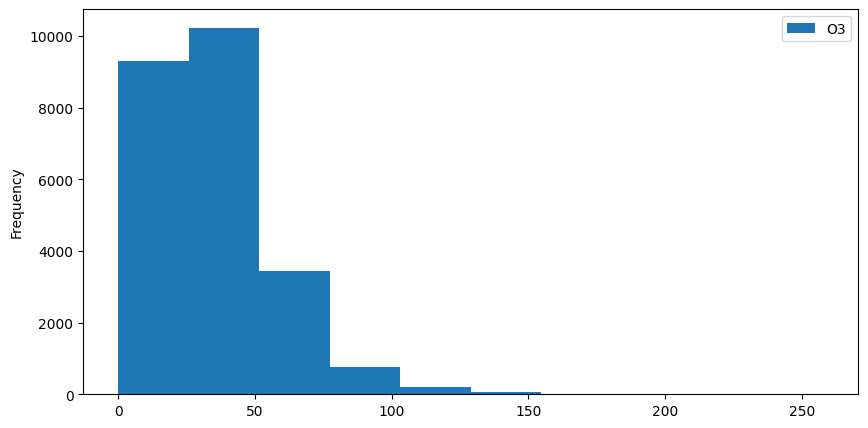

In [20]:
df['O3'].plot(kind ='hist',figsize=(10,5))
plt.legend()
plt.show()

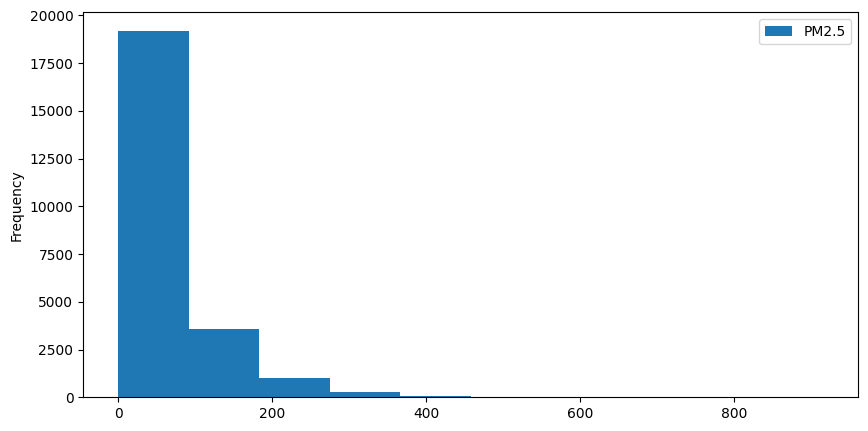

In [21]:
df['PM2.5'].plot(kind ='hist',figsize=(10,5))
plt.legend()
plt.show()

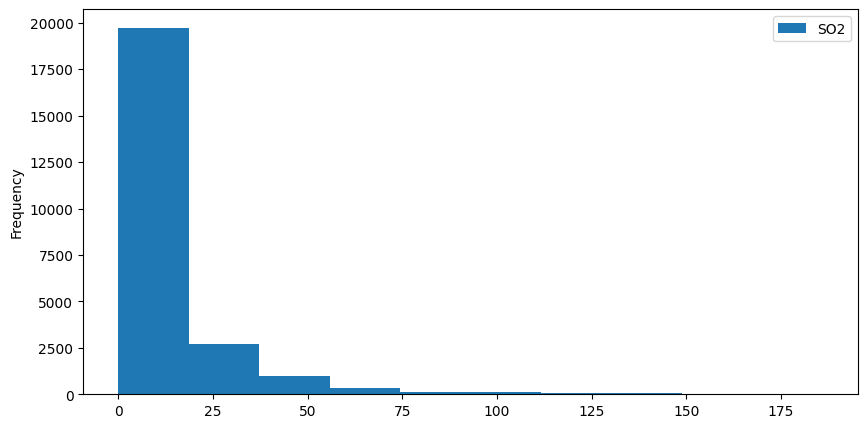

In [22]:
df['SO2'].plot(kind ='hist',figsize=(10,5))
plt.legend()
plt.show()

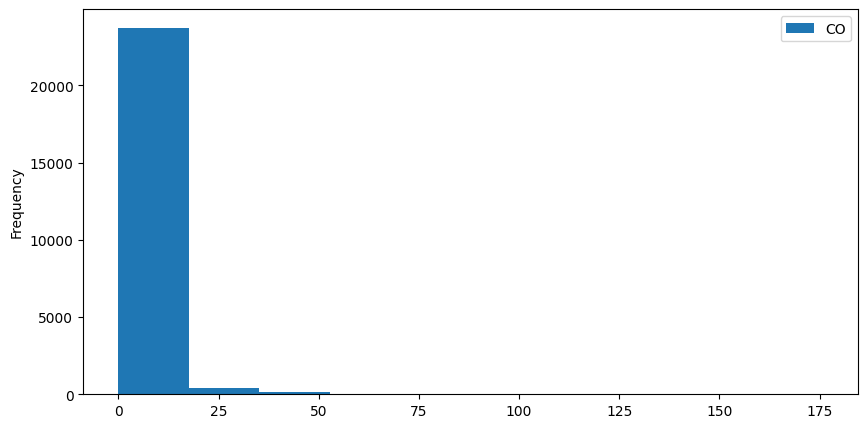

In [23]:
df['CO'].plot(kind ='hist',figsize=(10,5))
plt.legend()
plt.show()

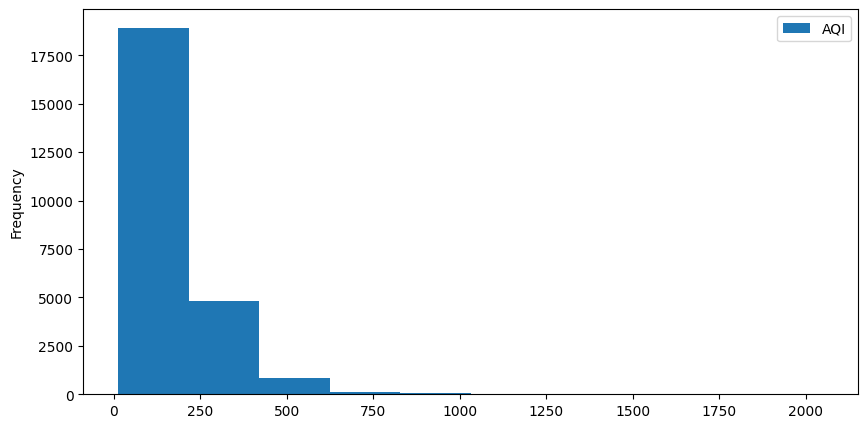

In [24]:
df['AQI'].plot(kind ='hist',figsize=(10,5))
plt.legend()
plt.show()

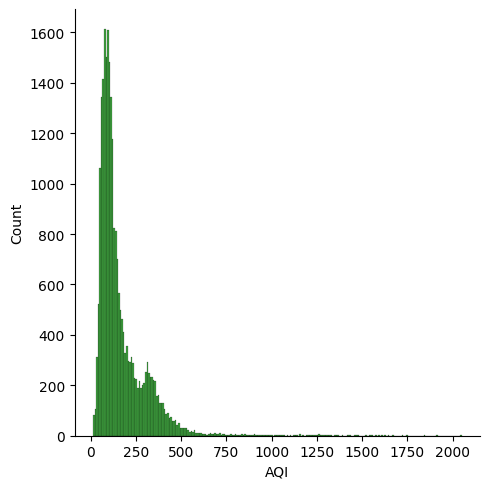

In [25]:
## DISTRUBUTION OF AQI from 2015 to 2020
sns.displot(df,x='AQI',color='green')
plt.show()

In [26]:
print(df.columns)


Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')


In [27]:
df.columns = df.columns.str.strip()


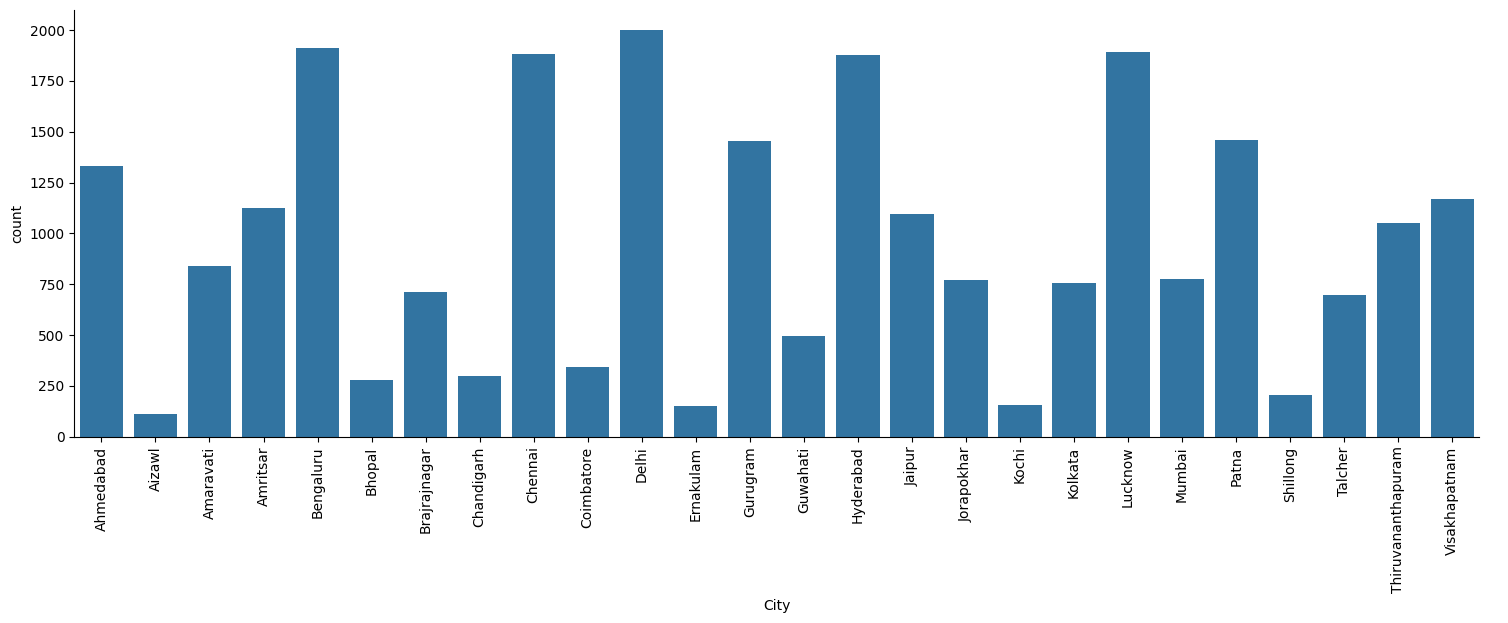

In [28]:
graph = sns.catplot(x="City", kind='count', data=df, height=5, aspect=3)
graph.set_xticklabels(rotation=90)

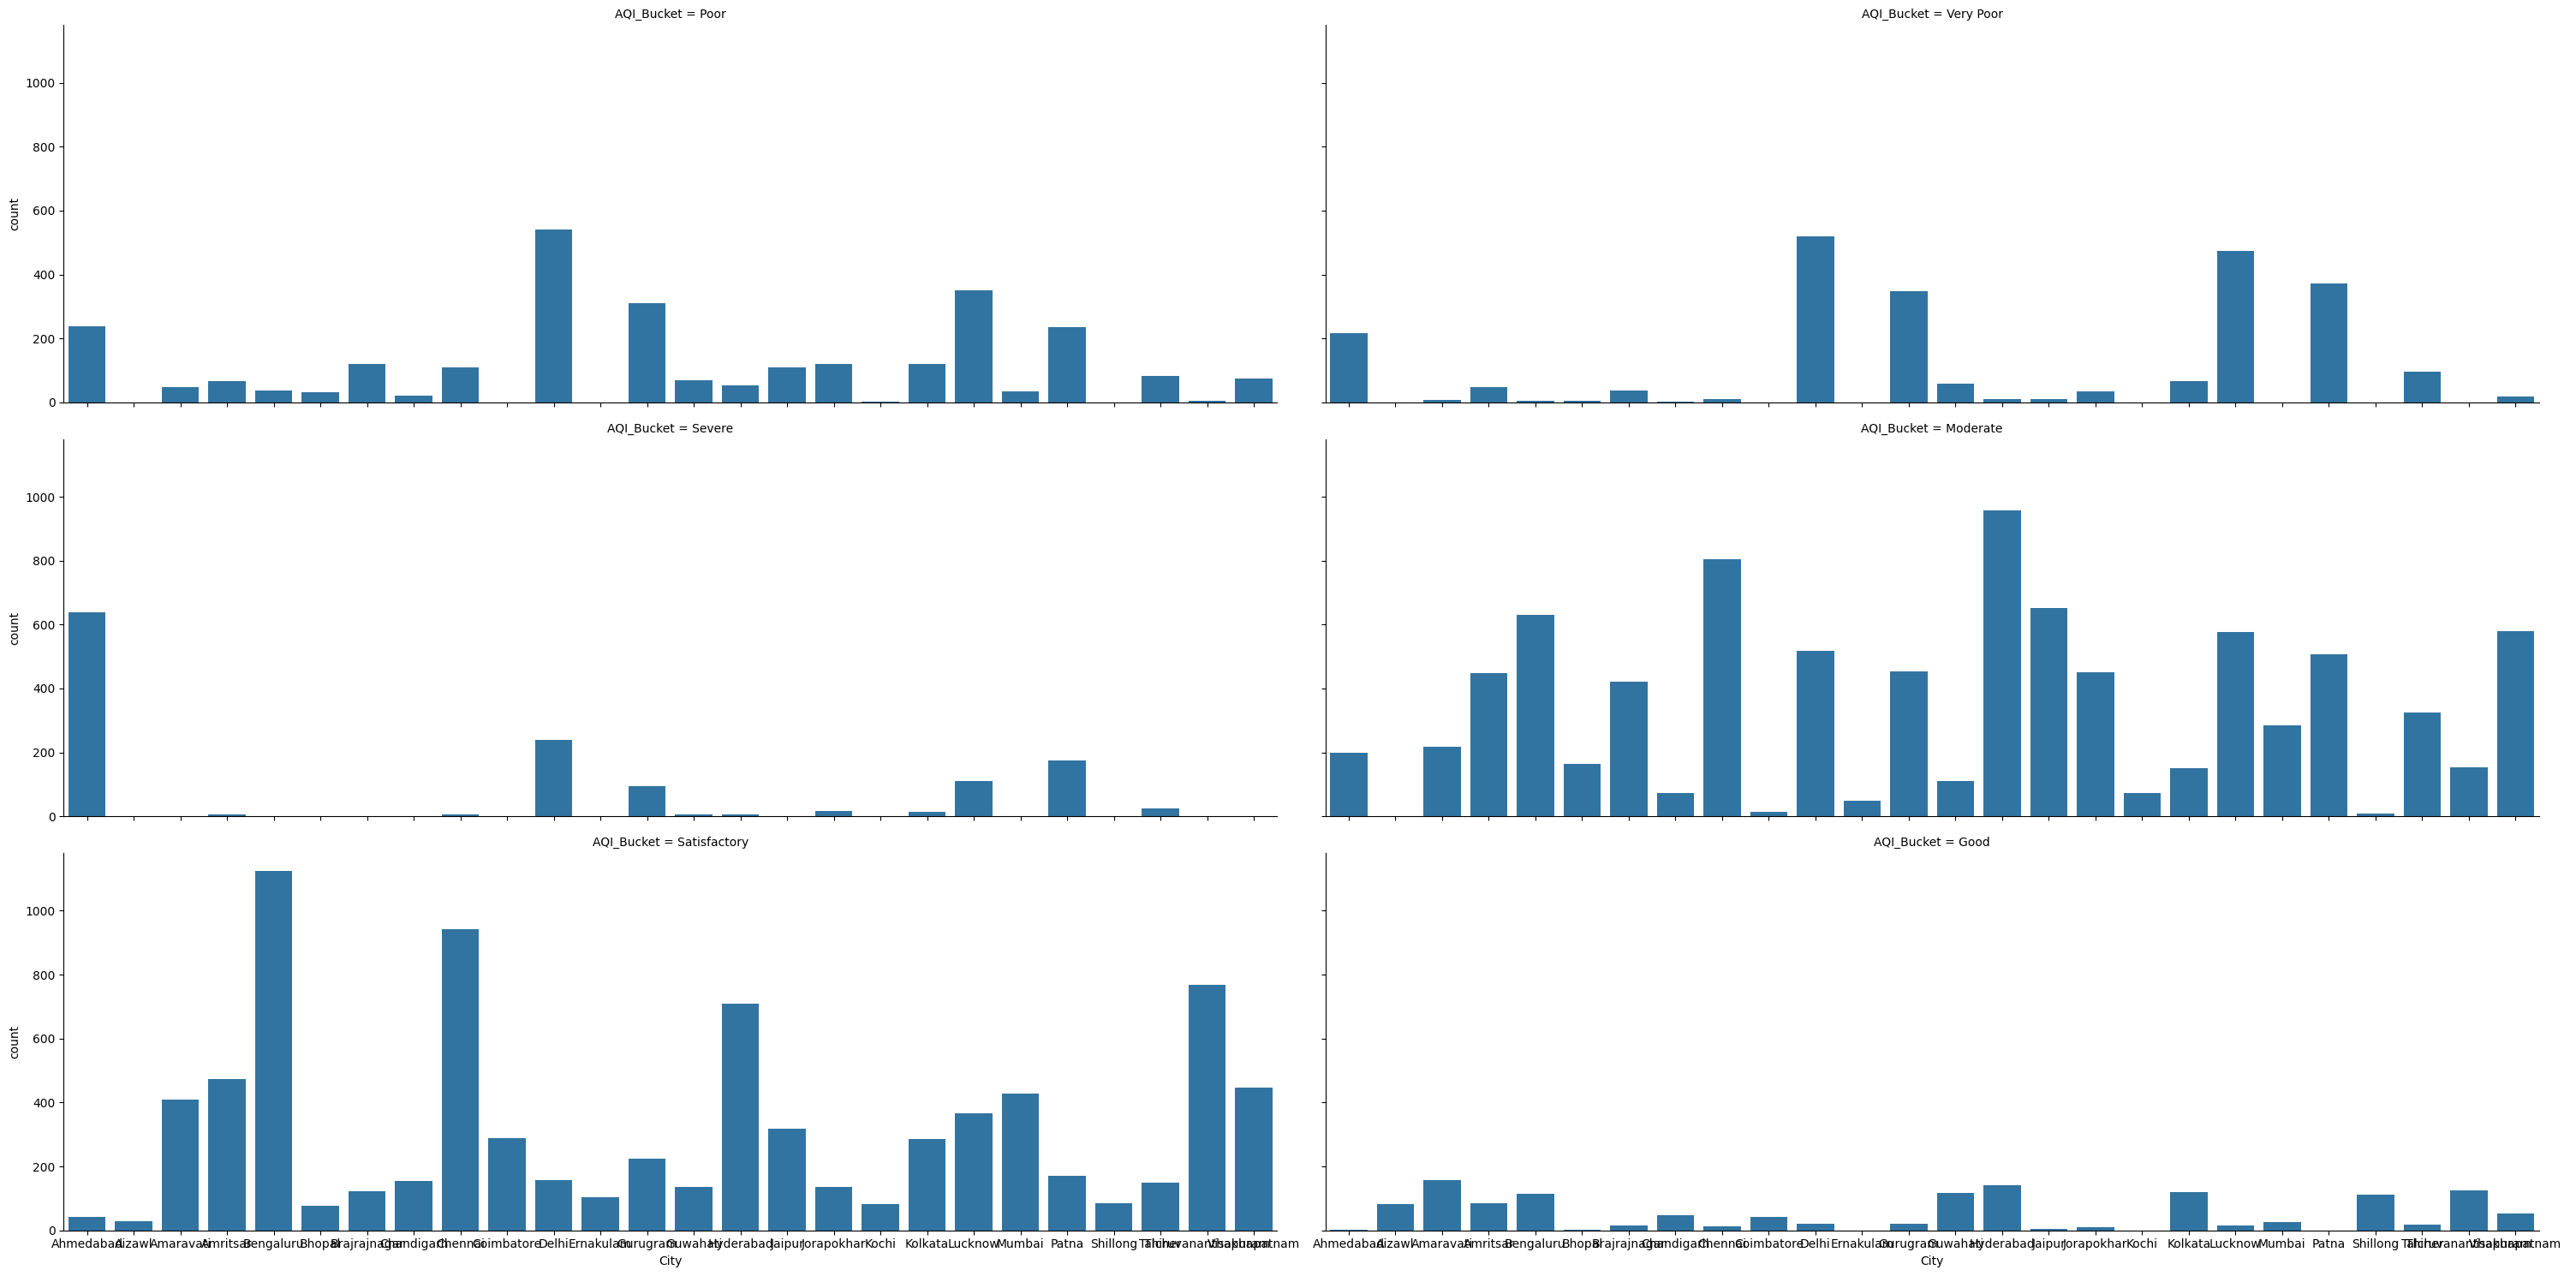

In [29]:
df.columns = df.columns.str.strip()
graph = sns.catplot(x="City", kind='count', data=df,col="AQI_Bucket",col_wrap=2,
                    height=5, aspect=3)


In [30]:
print(df.columns)


Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')


In [31]:
df.columns = df.columns.str.strip()


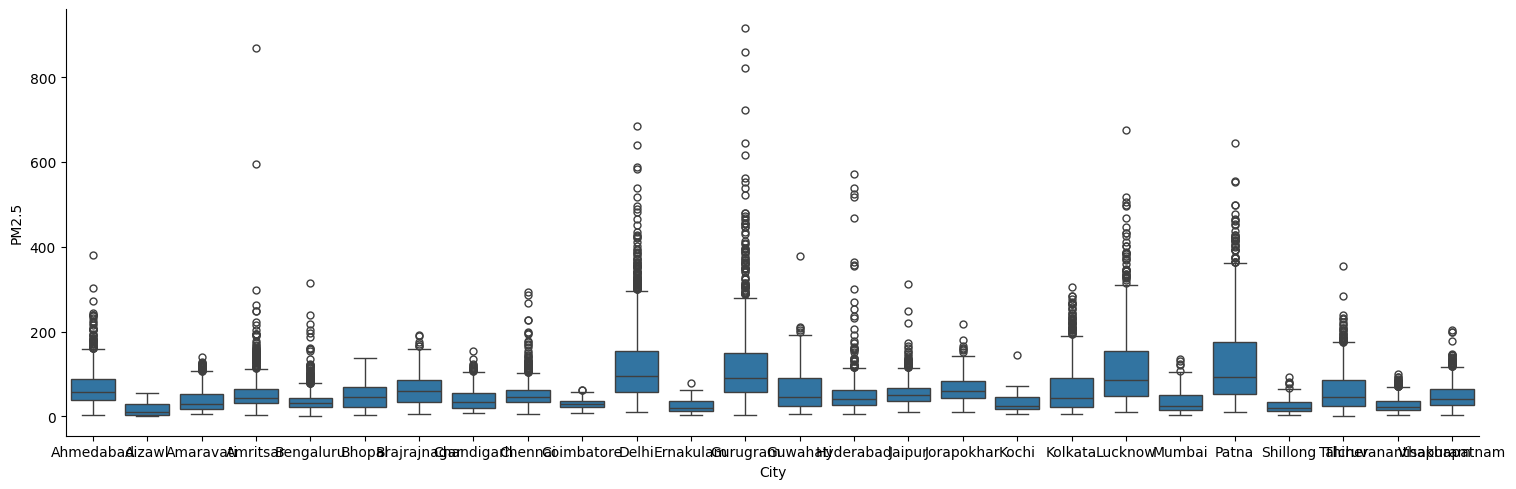

In [32]:
graph1 = sns.catplot(x="City", y="PM2.5", kind='box', data=df, height=5, aspect=3)


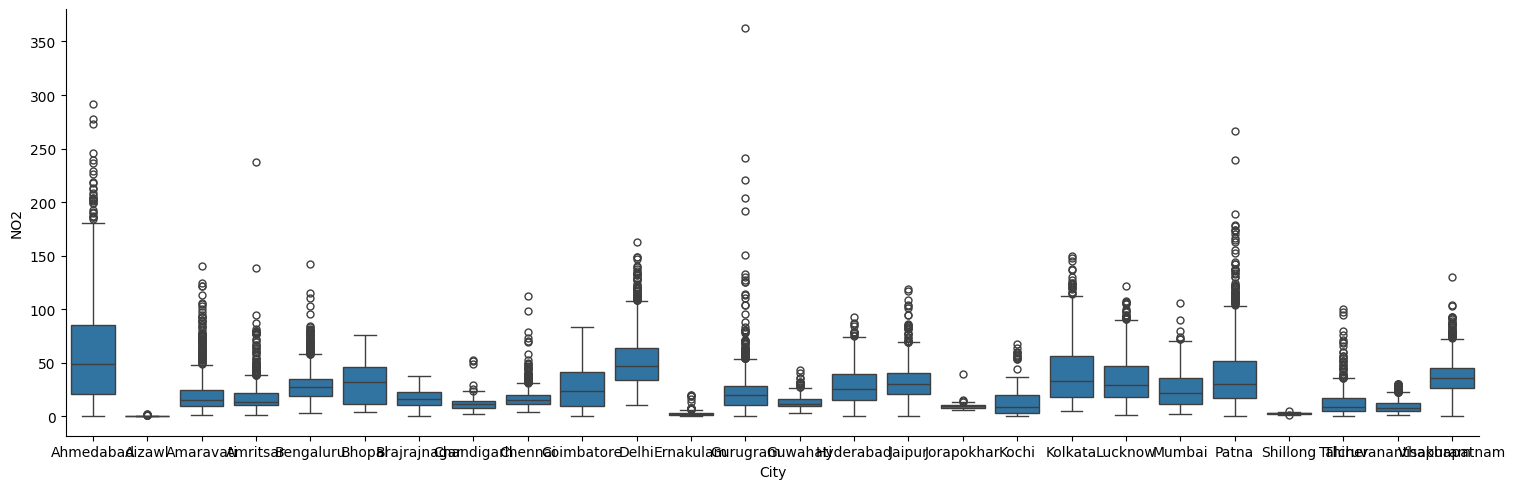

In [33]:
graph2 = sns.catplot(x="City", y="NO2", kind='box', data=df, height=5, aspect=3)

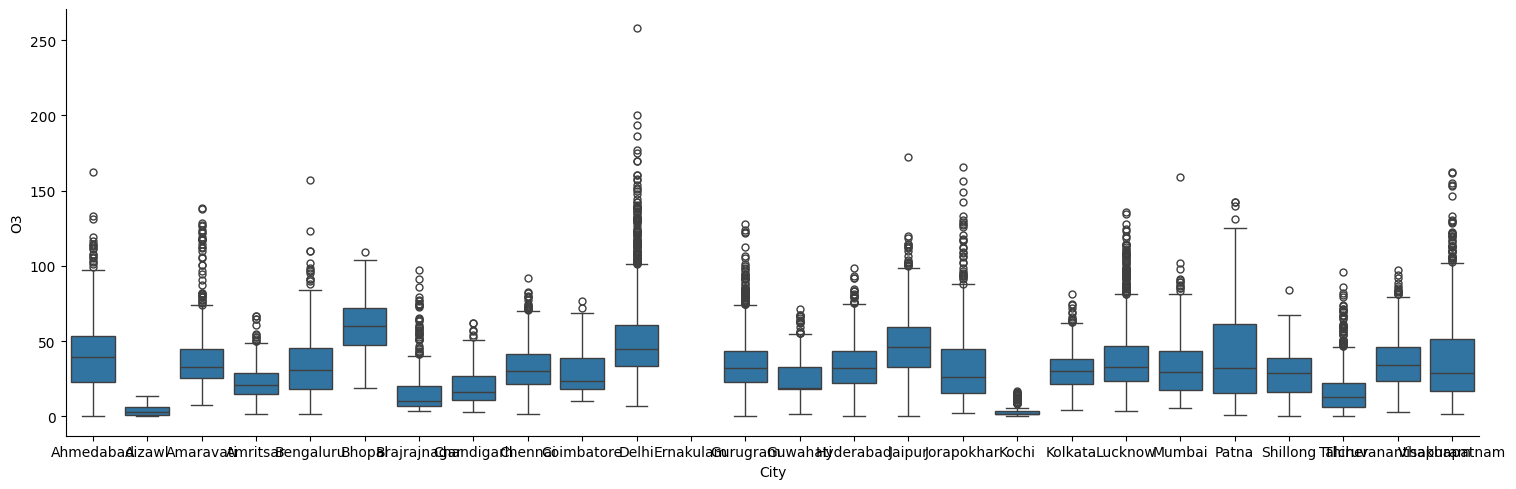

In [34]:
graph3 = sns.catplot(x="City", y="O3", kind='box', data=df, height=5, aspect=3)

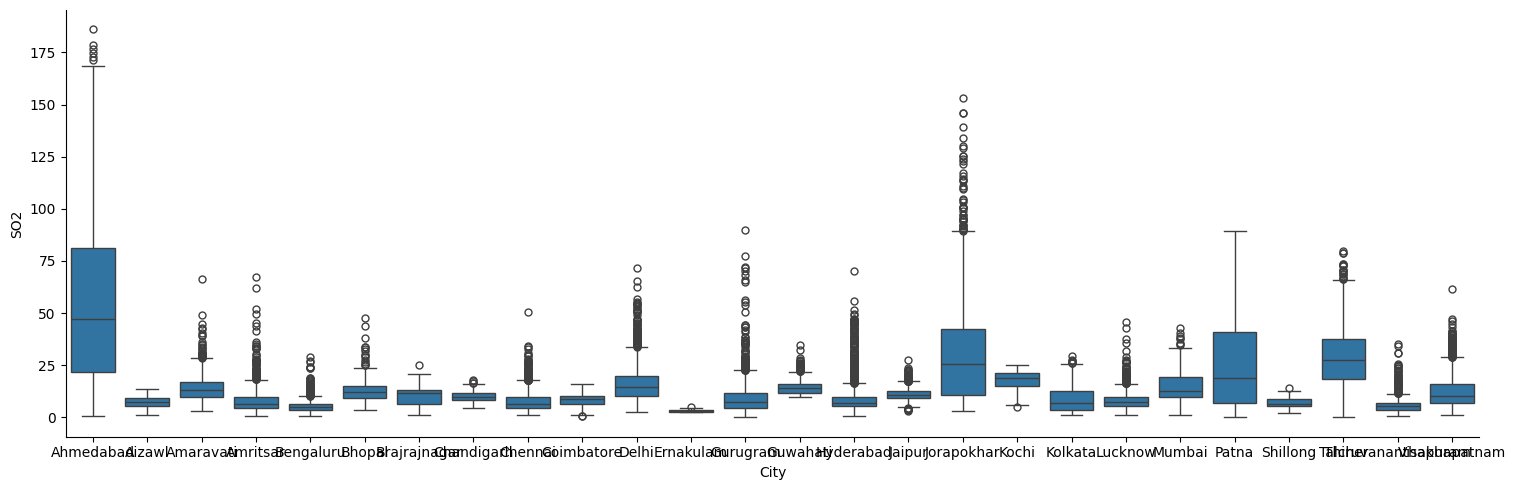

In [35]:
graph4 = sns.catplot(x="City", y="SO2", kind='box', data=df, height=5, aspect=3)

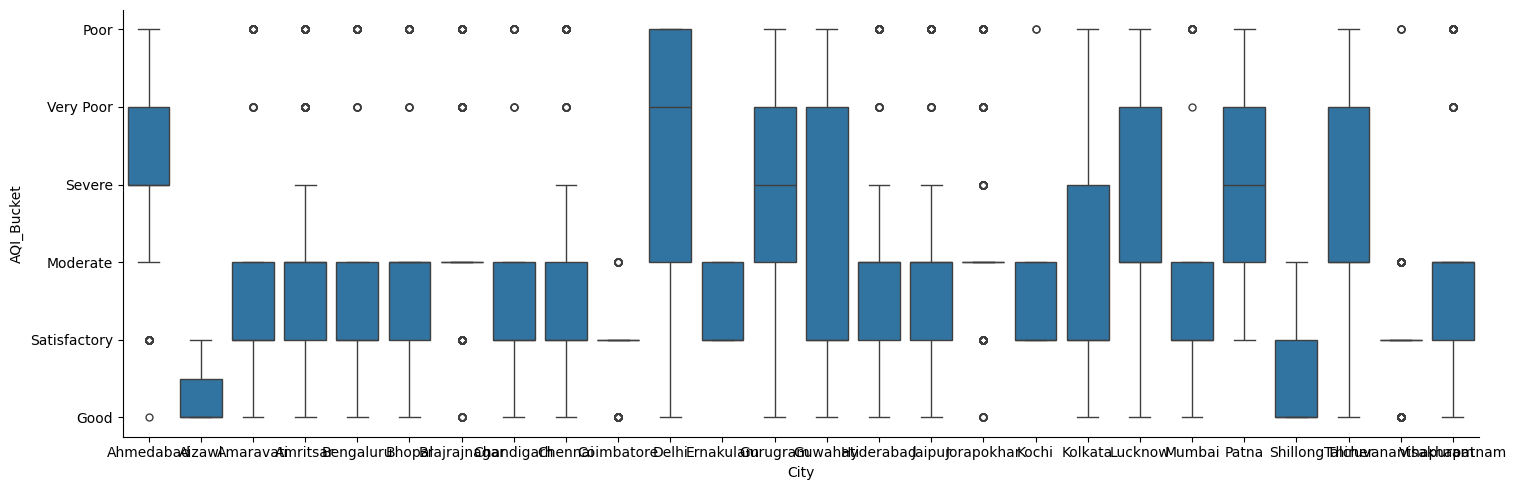

In [36]:
graph5 = sns.catplot(x="City", y="AQI_Bucket", kind='box', data=df, height=5, aspect=3)

In [37]:
#to check the null values
df.isnull().sum().sort_values(ascending=False)

Xylene        15372
PM10           7086
NH3            6536
Toluene        5826
Benzene        3535
NOx            1857
O3              807
PM2.5           678
SO2             605
CO              445
NO2             391
NO              387
Date              0
City              0
AQI               0
AQI_Bucket        0
dtype: int64

In [38]:
df.describe().loc["mean"]

PM2.5       67.476613
PM10       118.454435
NO          17.622421
NO2         28.978391
NOx         32.289012
NH3         23.848366
CO           2.345267
SO2         14.362933
O3          34.912885
Benzene      3.458668
Toluene      9.525714
Xylene       3.588683
AQI        166.463581
Name: mean, dtype: float64

In [39]:
df = df.replace({
    "PM2.5": {np.nan: 67.476613},
    "PM10": {np.nan: 118.454435},
    "NO": {np.nan: 17.622421},
    "NO2": {np.nan: 28.978391},
    "NOx": {np.nan: 32.289012},
    "NH3": {np.nan: 23.848366},
    "CO": {np.nan: 2.345267},
    "SO2": {np.nan: 34.912885},
    "O3": {np.nan: 38.320547},
    "Benzene": {np.nan: 3.458668},
    "Toluene": {np.nan: 9.525714},
    "Xylene": {np.nan: 3.588683}
})

In [40]:
df.isnull().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [41]:
df=df.drop(['AQI_Bucket'],axis=1)

In [42]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
28,Ahmedabad,2015-01-29,83.13,118.454435,6.93,28.71,33.72,23.848366,6.93,49.52,59.76,0.02,0.00,3.14,209.0
29,Ahmedabad,2015-01-30,79.84,118.454435,13.85,28.68,41.08,23.848366,13.85,48.49,97.07,0.04,0.00,4.81,328.0
30,Ahmedabad,2015-01-31,94.52,118.454435,24.39,32.66,52.61,23.848366,24.39,67.39,111.33,0.24,0.01,7.67,514.0
31,Ahmedabad,2015-02-01,135.99,118.454435,43.48,42.08,84.57,23.848366,43.48,75.23,102.70,0.40,0.04,25.87,782.0
32,Ahmedabad,2015-02-02,178.33,118.454435,54.56,35.31,72.80,23.848366,54.56,55.04,107.38,0.46,0.06,35.61,914.0


<Axes: >

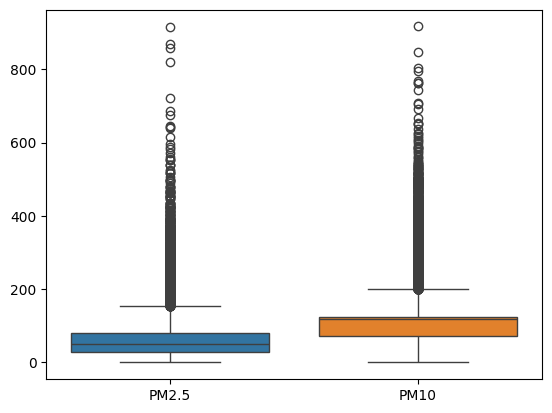

In [43]:
sns.boxplot(data=df[["PM2.5","PM10"]])

<Axes: >

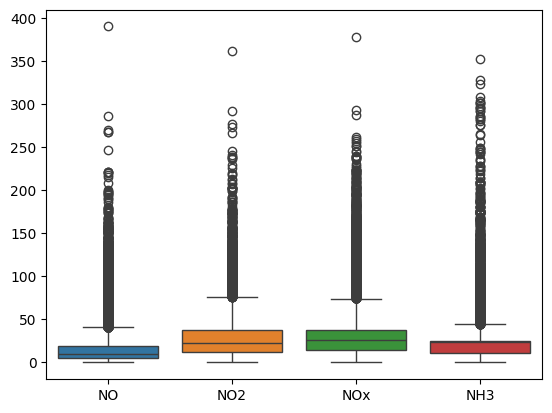

In [44]:
sns.boxplot(data=df[["NO","NO2","NOx","NH3"]])

Column Names in DataFrame: ['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']
Column '3' not found! Searching for closest matches...
Did you mean: ['O3']


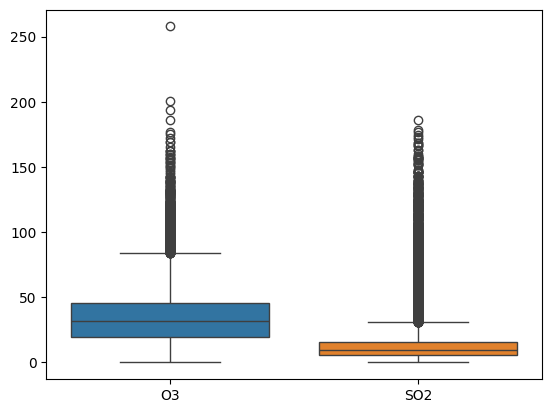

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import difflib

# Sample DataFrame (Replace with your actual data loading method)
# df = pd.read_csv("your_file.csv")  # Uncomment this if loading from a CSV

# Ensure column names are strings and stripped of any spaces
df.columns = df.columns.astype(str).str.strip()

# Print all column names to verify
print("Column Names in DataFrame:", df.columns.tolist())

# Define the target column name
target_column = "3"  # Change this if your intended column name is different

# Check if the target column exists
if target_column not in df.columns:
    print(f"Column '{target_column}' not found! Searching for closest matches...")
    matches = difflib.get_close_matches(target_column, df.columns)
    if matches:
        print("Did you mean:", matches)
        target_column = matches[0]  # Select the closest match
    else:
        raise KeyError(f"Column '{target_column}' not found in DataFrame.")

# Ensure 'SO2' column also exists
if "SO2" not in df.columns:
    raise KeyError("Column 'SO2' not found in DataFrame.")

# Plot the boxplot
sns.boxplot(data=df[[target_column, "SO2"]])
plt.show()


In [46]:
# IQR Method - Q3 Q1
def replace_outliers(df):
    for column in df.select_dtypes(include=['number']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lb = Q1 - 1.5 * IQR
        ub = Q3 + 1.5 * IQR
        df[column] = df[column].apply(
            lambda x: Q1 if x < lb else (Q3 if x > ub else x)
        )
    return df

In [47]:
df=replace_outliers(df)

In [48]:
df.describe().transpose

<bound method DataFrame.transpose of               PM2.5          PM10            NO           NO2           NOx  \
count  24850.000000  24850.000000  24850.000000  24850.000000  24850.000000   
mean      55.174281    101.351323     12.507694     25.901114     26.574513   
std       31.829575     39.079916      8.762015     16.669494     16.138682   
min        0.040000      0.030000      0.030000      0.010000      0.000000   
25%       29.560000     71.780000      5.720000     12.090000     14.030000   
50%       50.165000    118.454435     10.075000     22.535000     25.720000   
75%       79.505625    122.955625     19.710000     37.910000     38.170000   
max      154.300000    199.700000     40.680000     76.620000     74.380000   

                NH3            CO           SO2            O3       Benzene  \
count  24850.000000  24850.000000  24850.000000  24850.000000  24850.000000   
mean      19.486584      1.040507     10.616411     33.288444      2.098520   
std        9.6

<Axes: >

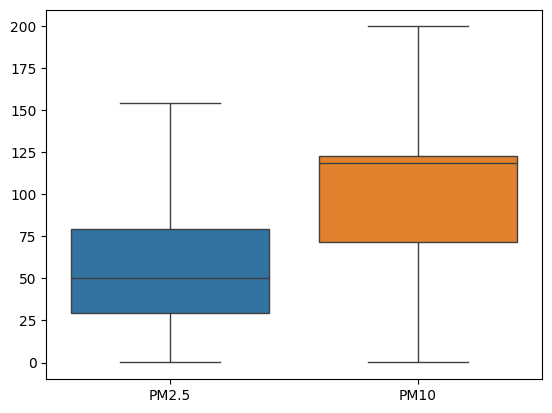

In [49]:
sns.boxplot(data=df[['PM2.5','PM10']])

<Axes: >

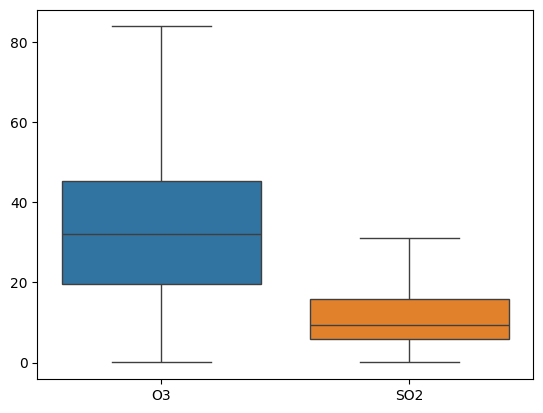

In [50]:
sns.boxplot(data=df[['O3','SO2']])

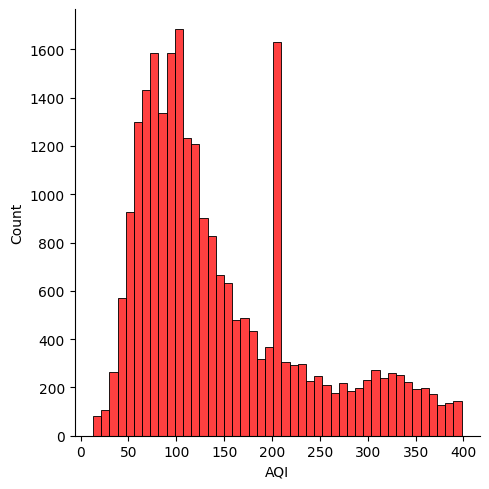

In [51]:
sns.displot(df,x="AQI",color="red")
plt.show()

In [52]:
import pandas as pd

# Ensure column names are strings and remove extra spaces
df.columns = df.columns.astype(str).str.strip()

# Print column names to check if 'city' exists
print("Available columns:", df.columns.tolist())

# Check if 'city' column is in DataFrame before dropping
if 'city' in df.columns:
    df1 = df.drop(columns=['city'])
    print("Column 'city' dropped successfully.")
else:
    print("Column 'city' not found! Please check the column names.")

# Optional: Show first few rows to verify
print(df1.head() if 'city' in df.columns else df.head())


Available columns: ['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']
Column 'city' not found! Please check the column names.
         City        Date     PM2.5        PM10     NO    NO2    NOx  \
28  Ahmedabad  2015-01-29   83.1300  118.454435   6.93  28.71  33.72   
29  Ahmedabad  2015-01-30   79.8400  118.454435  13.85  28.68  41.08   
30  Ahmedabad  2015-01-31   94.5200  118.454435  24.39  32.66  52.61   
31  Ahmedabad  2015-02-01  135.9900  118.454435  19.71  42.08  38.17   
32  Ahmedabad  2015-02-02   79.5075  118.454435  19.71  35.31  72.80   

          NH3    CO    SO2       O3  Benzene  Toluene    Xylene    AQI  
28  23.848366  1.53  15.94  59.7600     0.02     0.00  3.140000  209.0  
29  23.848366  1.53  15.94  45.3975     0.04     0.00  4.810000  328.0  
30  23.848366  1.53  15.94  45.3975     0.24     0.01  3.588683  208.0  
31  23.848366  1.53  15.94  45.3975     0.40     0.04  3.588683  208.0  
32  23.8

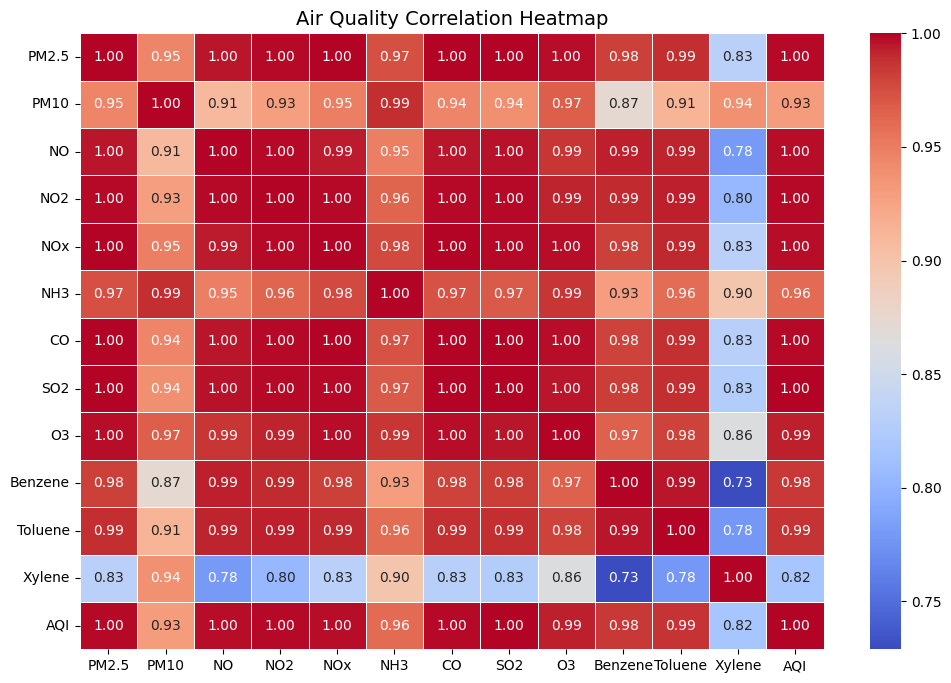

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Creating the DataFrame
data = {
    "PM2.5": [55.17, 31.83, 0.04, 29.56, 50.16, 79.51, 154.30],
    "PM10": [101.35, 39.08, 0.03, 71.78, 118.45, 122.96, 199.70],
    "NO": [12.51, 8.76, 0.03, 5.72, 10.08, 19.71, 40.68],
    "NO2": [25.90, 16.67, 0.01, 12.09, 22.54, 37.91, 76.62],
    "NOx": [26.57, 16.14, 0.00, 14.03, 25.72, 38.17, 74.38],
    "NH3": [19.49, 9.63, 0.01, 11.28, 23.85, 24.71, 44.85],
    "CO": [1.04, 0.62, 0.00, 0.59, 0.95, 1.53, 2.94],
    "SO2": [10.62, 6.09, 0.01, 5.79, 9.43, 15.94, 31.16],
    "O3": [33.29, 17.51, 0.01, 19.64, 32.06, 45.40, 83.99],
    "Benzene": [2.10, 1.83, 0.00, 0.34, 1.81, 3.46, 8.13],
    "Toluene": [6.22, 4.70, 0.00, 1.58, 6.79, 9.53, 21.44],
    "Xylene": [3.30, 0.56, 1.25, 2.65, 3.59, 3.59, 4.99],
    "AQI": [146.93, 87.42, 13.00, 81.00, 118.00, 208.00, 398.00],
}

df = pd.DataFrame(data)

# Set figure size
plt.figure(figsize=(12, 8))

# Create heatmap
sns.heatmap(
    df.corr(),  # Compute correlation matrix
    annot=True,  # Show values inside cells
    cmap="coolwarm",  # Color map
    fmt=".2f",  # Decimal format for annotations
    linewidths=0.5,  # Line width between cells
    cbar=True  # Show color bar
)

# Title
plt.title("Air Quality Correlation Heatmap", fontsize=14)

# Show plot
plt.show()


## Week 3 - Data Modeling - 10 March 2025

In [54]:
# Drop columns safely without errors
df = df.drop(columns=[col for col in ['Date', 'City'] if col in df.columns])
df.head()


,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,55.17,101.35,12.51,25.90,26.57,19.49,1.04,10.62,33.29,2.10,6.22,3.30,146.93
1,31.83,39.08,8.76,16.67,16.14,9.63,0.62,6.09,17.51,1.83,4.70,0.56,87.42
2,0.04,0.03,0.03,0.01,0.00,0.01,0.00,0.01,0.01,0.00,0.00,1.25,13.00
3,29.56,71.78,5.72,12.09,14.03,11.28,0.59,5.79,19.64,0.34,1.58,2.65,81.00
4,50.16,118.45,10.08,22.54,25.72,23.85,0.95,9.43,32.06,1.81,6.79,3.59,118.00


In [55]:
# Scaling - Standard Scaler
from sklearn.preprocessing import StandardScaler
df1 = StandardScaler().fit_transform(df)
df1

array([[-0.04489743,  0.1341041 , -0.11553591, -0.0652363 , -0.05862807,
         0.02809937, -0.06404744, -0.07222966,  0.00654267, -0.16806107,
        -0.14688582,  0.32345356, -0.02949221],
       [-0.55500463, -0.90786805, -0.42126348, -0.46896404, -0.53317742,
        -0.71497275, -0.5468666 , -0.55954933, -0.63301809, -0.27500902,
        -0.37945503, -1.63359353, -0.5448265 ],
       [-1.24979075, -1.56129688, -1.13299726, -1.19768604, -1.26752321,
        -1.43995792, -1.25959964, -1.21361194, -1.34229016, -0.99987848,
        -1.09858351, -1.1407605 , -1.18927579],
       [-0.6046166 , -0.36069462, -0.66910663, -0.66929698, -0.62917926,
        -0.59062498, -0.58135368, -0.59182216, -0.54668954, -0.86520328,
        -0.85683394, -0.14080944, -0.60042129],
       [-0.15439345,  0.42024067, -0.31364737, -0.21220545, -0.09730179,
         0.35667892, -0.16750869, -0.2002452 , -0.04330902, -0.28293109,
        -0.05967236,  0.53058628, -0.28001516],
       [ 0.48706527,  0.495707

In [56]:
df = pd.DataFrame(df1, columns=df.columns)
df.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,-0.044897,0.134104,-0.115536,-0.065236,-0.058628,0.028099,-0.064047,-0.072230,0.006543,-0.168061,-0.146886,0.323454,-0.029492
1,-0.555005,-0.907868,-0.421263,-0.468964,-0.533177,-0.714973,-0.546867,-0.559549,-0.633018,-0.275009,-0.379455,-1.633594,-0.544826
2,-1.249791,-1.561297,-1.132997,-1.197686,-1.267523,-1.439958,-1.259600,-1.213612,-1.342290,-0.999878,-1.098584,-1.140761,-1.189276
3,-0.604617,-0.360695,-0.669107,-0.669297,-0.629179,-0.590625,-0.581354,-0.591822,-0.546690,-0.865203,-0.856834,-0.140809,-0.600421
4,-0.154393,0.420241,-0.313647,-0.212205,-0.097302,0.356679,-0.167509,-0.200245,-0.043309,-0.282931,-0.059672,0.530586,-0.280015


In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [58]:
df.columns

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI'],
      dtype='object')

In [59]:
# Feature & Target Selection
X = df[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene']]
y = df['AQI']

In [60]:
X.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
0,-0.044897,0.134104,-0.115536,-0.065236,-0.058628,0.028099,-0.064047,-0.072230,0.006543,-0.168061,-0.146886,0.323454
1,-0.555005,-0.907868,-0.421263,-0.468964,-0.533177,-0.714973,-0.546867,-0.559549,-0.633018,-0.275009,-0.379455,-1.633594
2,-1.249791,-1.561297,-1.132997,-1.197686,-1.267523,-1.439958,-1.259600,-1.213612,-1.342290,-0.999878,-1.098584,-1.140761
3,-0.604617,-0.360695,-0.669107,-0.669297,-0.629179,-0.590625,-0.581354,-0.591822,-0.546690,-0.865203,-0.856834,-0.140809
4,-0.154393,0.420241,-0.313647,-0.212205,-0.097302,0.356679,-0.167509,-0.200245,-0.043309,-0.282931,-0.059672,0.530586


In [61]:
# Split the data into training and testing data - Training set - 80% | Testing set - 20%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Shape of X Train',X_train.shape)
print('Shape of X Test',X_test.shape)
print('Shape of y Train',y_train.shape)
print('Shape of y Test',y_test.shape)

Shape of X Train (5, 12)
Shape of X Test (2, 12)
Shape of y Train (5,)
Shape of y Test (2,)


In [62]:
# Linear Regression Model
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [63]:
# Predicting the values:
train_pred = LR.predict(X_train) # Predicting train
test_pred = LR.predict(X_test) # Predicting test

In [64]:
# Evaluation for Linear Regression
RMSE_train = (np.sqrt(mean_squared_error(y_train, train_pred)))
RMSE_test = (np.sqrt(mean_squared_error(y_test, test_pred)))
print('RMSE Train Data = ', str(RMSE_train))
print('RMSE Test Data = ', str(RMSE_test))
print('_'* 60)
print('R Squared value for Train = ', LR.score(X_train, y_train))
print('R Squared value on Test = ', LR.score(X_test, y_test))

RMSE Train Data =  8.3966924085694565e-16
RMSE Test Data =  0.20376757508930993
____________________________________________________________
R Squared value for Train =  1.0
R Squared value on Test =  0.3746083627296195


In [65]:
# KNN
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [66]:
# Predicting the values:
train_pred = knn.predict(X_train) # Predicting train
test_pred = knn.predict(X_test) # Predicting test

# Evaluation for KNN
RMSE_train = (np.sqrt(mean_squared_error(y_train, train_pred)))
RMSE_test = (np.sqrt(mean_squared_error(y_test, test_pred)))
print('RMSE Train Data = ', str(RMSE_train))
print('RMSE Test Data = ', str(RMSE_test))
print('_'* 60)
print('R Squared value for Train = ', knn.score(X_train, y_train))
print('R Squared value on Test = ', knn.score(X_test, y_test))

RMSE Train Data =  1.1520699549111975
RMSE Test Data =  0.47750908241506707
____________________________________________________________
R Squared value for Train =  0.0
R Squared value on Test =  -2.4343550241044585


In [67]:
# Decision Tree
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [68]:
# Predicting the values:
train_pred = dtr.predict(X_train) # Predicting train
test_pred = dtr.predict(X_test) # Predicting test

# Evaluation for Decision Tree Regressor
RMSE_train = (np.sqrt(mean_squared_error(y_train, train_pred)))
RMSE_test = (np.sqrt(mean_squared_error(y_test, test_pred)))
print('RMSE Train Data = ', str(RMSE_train))
print('RMSE Test Data = ', str(RMSE_test))
print('_'* 60)
print('R Squared value for Train = ', dtr.score(X_train, y_train))
print('R Squared value on Test = ', dtr.score(X_test, y_test))

RMSE Train Data =  0.0
RMSE Test Data =  0.2577661656589231
____________________________________________________________
R Squared value for Train =  1.0
R Squared value on Test =  -0.0007687550609707383


In [69]:
# Random Forest Regressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [70]:
# Predicting the values:
train_pred = rfr.predict(X_train) # Predicting train
test_pred = rfr.predict(X_test) # Predicting test

# Evaluation for Randome Forest Regressor
RMSE_train = (np.sqrt(mean_squared_error(y_train, train_pred)))
RMSE_test = (np.sqrt(mean_squared_error(y_test, test_pred)))
print('RMSE Train Data = ', str(RMSE_train))
print('RMSE Test Data = ', str(RMSE_test))
print('_'* 60)
print('R Squared value for Train = ', rfr.score(X_train, y_train))
print('R Squared value on Test = ', rfr.score(X_test, y_test))

RMSE Train Data =  0.38385512427264595
RMSE Test Data =  0.11262960143495836
____________________________________________________________
R Squared value for Train =  0.8889861961734385
R Squared value on Test =  0.8089324170695409
